In [1]:
import pandas as pd
import numpy as np

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Acquire:

In [2]:
ca = pd.read_csv('22.31.10_CA_videos.csv')
de = pd.read_csv('22.31.10_DE_videos.csv')
fr = pd.read_csv('22.31.10_FR_videos.csv')
gb = pd.read_csv('22.31.10_GB_videos.csv')
ind = pd.read_csv('22.31.10_IN_videos.csv')
jp = pd.read_csv('22.31.10_JP_videos.csv')
kr = pd.read_csv('22.31.10_KR_videos.csv')
mx = pd.read_csv('22.31.10_MX_videos.csv')
ru = pd.read_csv('22.31.10_RU_videos.csv')
us=pd.read_csv('youtube_us.csv')

In [3]:
ca['region']='ca'
de['region']='de'
fr['region']='fr'
gb['region']='gb'
ind['region']='ind'
jp['region']='jp'
kr['region']='kr'
mx['region']='mx'
ru['region']='ru'
us['region']='us'

In [4]:
us.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,region
0,lVxm9Cuc5RY,"Jake Paul KNOCKS DOWN Anderson Silva late, win...",2022-10-30T07:04:52Z,CBS Sports HQ,17,22.31.10,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,368933,2708,1916,https://i.ytimg.com/vi/lVxm9Cuc5RY/default.jpg,False,False,Brian Campbell joins CBS Sports HQ to break do...,PT9M27S,False,us
1,Mn6S0TVYon4,Ross Chastain pulls off INSANE move on Denny H...,2022-10-30T22:50:49Z,Motorsports on NBC,17,22.31.10,nbc sports|nascar|nascar highlights|nascar new...,180610,2438,476,https://i.ytimg.com/vi/Mn6S0TVYon4/default.jpg,False,False,Ross Chastain pulls off the move of the season...,PT3M37S,True,us
2,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30T17:59:03Z,Magic: The Gathering,20,22.31.10,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,https://i.ytimg.com/vi/L2DGv2bmsqo/default.jpg,False,False,Phyrexians have taken root in Dominaria as a s...,PT3M24S,True,us
3,1OZqvprj_Rk,Deleting My YouTube Channel.,2022-10-29T17:03:00Z,CoryxKenshin,20,22.31.10,deleting|my|youtube|channel|coryxkenshin|cory|...,6685520,773970,134039,https://i.ytimg.com/vi/1OZqvprj_Rk/default.jpg,False,False,Promise broken. Thank you for everything.,PT19M19S,False,us
4,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30T21:31:19Z,MMAWeekly.com,17,22.31.10,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,PT4M5S,False,us


In [5]:
df = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, us])

In [6]:
df.region.nunique()

8

In [7]:
df['rank'] = df.index + 1

In [8]:
df=df.reset_index()

In [9]:
df.region.nunique()

8

In [10]:
df.isnull().sum()

index                 0
video_id              0
title                 0
publishedAt           0
channelTitle          0
categoryId            0
trending_date         0
tags                  0
view_count            0
likes                 0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description          18
duration              0
captions              0
region                0
rank                  0
dtype: int64

In [11]:
df.region.nunique()

8

In [12]:
df.description = df.description.fillna('no description')

In [13]:
df.columns

Index(['index', 'video_id', 'title', 'publishedAt', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'duration', 'captions', 'region',
       'rank'],
      dtype='object')

In [14]:
df.dtypes

index                 int64
video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId           object
trending_date        object
tags                 object
view_count           object
likes                object
comment_count        object
thumbnail_link       object
comments_disabled    object
ratings_disabled     object
description          object
duration             object
captions             object
region               object
rank                  int64
dtype: object

In [15]:
df.region.nunique()

8

In [16]:
df=df.sort_values(by=['rank'])

In [17]:
df['rank'] = df.reset_index().index + 1

In [18]:
df.ratings_disabled.nunique()

2

In [19]:
df[df.duplicated(['video_id'], keep=False) == True].sort_values(by='rank').drop_duplicates(['video_id'], inplace=True)

In [20]:
df.head(25)

,index,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,region,rank
0,0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30T21:31:19Z,MMAWeekly.com,17,22.31.10,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,PT4M5S,False,ca,1
400,0,MgMBMvCvME4,Tyson Fury LOSES IT with True Geordie Over Chi...,2022-10-30T19:34:07Z,True Geordie,17,22.31.10,Tyson Fury|Anthony Joshua|matchroom boxing|Edd...,761980,44508,8888,https://i.ytimg.com/vi/MgMBMvCvME4/default.jpg,False,False,In today’s episode of the True Geordie podcast...,PT17M27S,False,gb,2
600,0,K5MPVfVpI7A,2022年 天皇賞（秋）（GⅠ） | 第166回 | JRA公式,2022-10-30T07:29:50Z,JRA公式チャンネル,17,22.31.10,JRA|日本中央競馬会|競馬|GⅠ|GⅡ|GⅢ|レース|乗馬|競走馬|WINS|JpnⅠ|重...,581089,8049,0,https://i.ytimg.com/vi/K5MPVfVpI7A/default.jpg,True,False,【レース概要】2022年10月30日（日曜）4回東京9日 発走時刻：15時40分天候 晴芝 ...,PT2M23S,False,jp,3
650,0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29T13:26:44Z,아는형님 Knowingbros,24,22.31.10,아는 형님|형님|형님 학교|미연|민니|소연|우기|슈화|아이들|여자아이들|강호동|이수...,765600,15295,645,https://i.ytimg.com/vi/sWwHWK7OYJ8/default.jpg,False,False,[아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토크 모음....,PT21M21S,True,kr,4
850,0,g9PSN5UBgdM,24 Часа в МАЙБАХЕ !,2022-10-31T09:00:25Z,A4,24,22.31.10,24 Часа в МАЙБАХЕ !|24 часа на майбахе|Майбах|...,4618374,508038,56386,https://i.ytimg.com/vi/g9PSN5UBgdM/default.jpg,False,False,В этом ролике мы провели 24 Часа в МАЙБАХЕ ! С...,PT33M16S,False,ru,5
1029,0,lVxm9Cuc5RY,"Jake Paul KNOCKS DOWN Anderson Silva late, win...",2022-10-30T07:04:52Z,CBS Sports HQ,17,22.31.10,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,368933,2708,1916,https://i.ytimg.com/vi/lVxm9Cuc5RY/default.jpg,False,False,Brian Campbell joins CBS Sports HQ to break do...,PT9M27S,False,us,6
750,0,X73IrWyGAQw,Pachuca vs Toluca | Resumen de la final del Ap...,2022-10-31T03:56:52Z,Marca Claro,17,22.31.10,Deportes|Videos de deportes|MARCAClaro|MARCA C...,466314,4678,538,https://i.ytimg.com/vi/X73IrWyGAQw/default.jpg,False,False,El Pachuca terminó con la tarea y finiquitó al...,PT13M31S,False,mx,7
200,0,c13Wd-LIVNE,7 vs. Wild - Behind the Scenes,2022-10-30T11:00:08Z,DAVE,24,22.31.10,Dave|7 vs. Wild|Behind the Scenes|Staffel 2|Fr...,922698,102462,2554,https://i.ytimg.com/vi/c13Wd-LIVNE/default.jpg,False,False,7vs.Wild Staffel 1 ist das größte YouTube Crea...,PT10M12S,False,de,8
201,1,Su_eagxxa1c,Das Jawort sorgt für Tränen - Michaela & Olive...,2022-10-30T13:00:13Z,Hochzeit auf den ersten Blick,24,22.31.10,Hochzeit auf den ersten Blick|Hochzeit|Heirate...,321275,320,28,https://i.ytimg.com/vi/Su_eagxxa1c/default.jpg,False,False,*Empfohlen ab 12 Jahren*Endlich ist sie da!: A...,PT6M46S,False,de,9
601,1,RTmg_MunJag,【速報】ソウル、雑踏事故で151人死亡 ハロウィーンで若者密集,2022-10-30T02:52:55Z,KYODO NEWS,25,22.31.10,共同通信|KYODO NEWS|韓国|ソウル|繁華街|梨泰院|ハロウィーン|若者|転倒|事故...,1872841,2561,0,https://i.ytimg.com/vi/RTmg_MunJag/default.jpg,True,False,韓国の首都ソウルの繁華街・梨泰院(イテウォン)でハロウィーンのために集まった多数の若者らが2...,PT22S,False,jp,10


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# prepare:

In [21]:
df.categoryId = df.categoryId.astype('object')

In [22]:
df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
df.publishedAt

0      2022-10-30 21:31:19+00:00
400    2022-10-30 19:34:07+00:00
600    2022-10-30 07:29:50+00:00
650    2022-10-29 13:26:44+00:00
850    2022-10-31 09:00:25+00:00
                  ...           
398    2022-10-26 14:57:00+00:00
599    2022-10-24 14:04:40+00:00
399    2022-10-26 12:00:24+00:00
199    2022-10-25 18:30:03+00:00
1228   2022-10-25 17:36:29+00:00
Name: publishedAt, Length: 1229, dtype: datetime64[ns, UTC]

In [23]:
df.trending_date = '22.31.10'

In [24]:
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
df.trending_date

0      2022-10-31 00:00:00+00:00
400    2022-10-31 00:00:00+00:00
600    2022-10-31 00:00:00+00:00
650    2022-10-31 00:00:00+00:00
850    2022-10-31 00:00:00+00:00
                  ...           
398    2022-10-31 00:00:00+00:00
599    2022-10-31 00:00:00+00:00
399    2022-10-31 00:00:00+00:00
199    2022-10-31 00:00:00+00:00
1228   2022-10-31 00:00:00+00:00
Name: trending_date, Length: 1229, dtype: datetime64[ns, UTC]

In [25]:
df['age']=(df.trending_date - df.publishedAt)

In [26]:
df.age = (df.age.dt.days * 24) + (df.age.dt.seconds/3600)

In [27]:
df[['age']]

,age
0,2.478056
400,4.431389
600,16.502778
650,34.554444
850,-9.006944
...,...
398,105.050000
599,153.922222
399,107.993333
199,125.499167


In [28]:
df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [29]:
df.region.nunique()

8

In [30]:
#adds sponsored column based on appearance of word sponsored in the description
df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
df[df.description.str.contains('sponsored')].shape

(10, 22)

In [31]:
testy = 'PT11H5M38S'

In [32]:
testy

'PT11H5M38S'

In [33]:
testy = list(testy)

In [34]:
testy

['P', 'T', '1', '1', 'H', '5', 'M', '3', '8', 'S']

In [35]:
testy.insert(-3, '00M')

In [36]:
testy = ''.join(testy)

In [37]:
testy

'PT11H5M00M38S'

In [38]:
def clean_duration(duration):
    print(duration)
    if ('S' not in duration) & ('M' not in duration):
        duration += '00M00S'
    elif 'M' not in duration:
        duration = list(duration)
        duration.insert(-3, '00M')
        duration = ''.join(duration)
    elif 'S' not in duration:
        duration += '00S'
    
    if 'H' in duration:
        duration = int(testy.split('H')[0].split('T')[1]) * 3600 + int(duration.split('H')[1].split('M')[0]) * 60 + int(duration.split('M')[1][:-1])
    elif duration.__contains__('M'):
        duration = int(duration.split('M')[0].split('T')[1]) * 60 + int(duration.split('M')[1][:-1])
    else:
        duration = int(duration[-3:-1])

    return duration

In [39]:
df['duration'] = df['duration'].apply(lambda x:clean_duration(x))

PT4M5S
PT17M27S
PT2M23S
PT21M21S
PT33M16S
PT9M27S
PT13M31S
PT10M12S
PT6M46S
PT22S
PT3M37S
PT47M50S
PT21M36S
PT19M41S
PT13M8S
PT41M12S
PT10M14S
PT9M21S
PT10M19S
PT5M20S
PT18M54S
PT14M47S
PT3M25S
PT3M24S
PT6M14S
PT11M37S
PT59M56S
PT19M19S
PT3M24S
PT23S
PT15M46S
PT29M36S
PT21M36S
PT11M15S
PT13M45S
PT37M47S
PT17M23S
PT4M5S
PT27M41S
PT4M5S
PT20M9S
PT11M26S
PT34M31S
PT19M41S
PT16M51S
PT9M
PT16M19S
PT8M39S
PT28M32S
PT6M41S
PT31M2S
PT4M56S
PT19M58S
PT9M33S
PT9M24S
PT3M52S
PT9M23S
PT32M11S
PT8M27S
PT23S
PT19M58S
PT54S
PT18M38S
PT2M18S
PT7M36S
PT3M19S
PT23M21S
PT11M3S
PT27M34S
PT3M19S
PT15M8S
PT44M30S
PT3M6S
PT19M58S
PT1M5S
PT4M7S
PT42M25S
PT17M8S
PT5M41S
PT2H22M52S
PT25M27S
PT7M38S
PT15M18S
PT2M45S
PT23M21S
PT31M52S
PT18M59S
PT8M15S
PT23M52S
PT10M31S
PT16M39S
PT21M36S
PT19M41S
PT16M42S
PT10M12S
PT12M9S
PT37M29S
PT23M29S
PT3M19S
PT33M21S
PT53M50S
PT4M37S
PT27M58S
PT33M47S
PT10M57S
PT4M30S
PT21M30S
PT3M28S
PT13M1S
PT34M31S
PT21M33S
PT3M10S
PT8M29S
PT2M57S
PT28M33S
PT5M20S
PT10M42S
PT11M15S
PT19M4

In [40]:
#making categorid into actual category titles
#all categoryId optain from youtube website
df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                   ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                   22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                   26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                   29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                   33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                   39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})

In [41]:
df.region.nunique()

8

In [42]:
df['duration']

0        245
400     1047
600      143
650     1281
850     1996
        ... 
398     1696
599      206
399       91
199     1023
1228     962
Name: duration, Length: 1229, dtype: int64

In [43]:
df.region.nunique()

8

In [44]:
def prepare_youtube(df):
    df.categoryId = df.categoryId.astype('object')
    df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
    df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
    df.trending_date = '22.31.10'
    df['age']=(df.trending_date - df.publishedAt)
    df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count
    df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
    df['duration'] = df['duration'].apply(lambda x:clean_duration(x))
    #making categorid into actual category titles
    #all categoryId optain from youtube website
    df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                       ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                       22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                       26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                       29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                       33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                       39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})
    return df


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   index              1229 non-null   int64              
 1   video_id           1229 non-null   object             
 2   title              1229 non-null   object             
 3   publishedAt        1229 non-null   datetime64[ns, UTC]
 4   channelTitle       1229 non-null   object             
 5   categoryId         1229 non-null   object             
 6   trending_date      1229 non-null   datetime64[ns, UTC]
 7   tags               1229 non-null   object             
 8   view_count         1229 non-null   object             
 9   likes              1229 non-null   object             
 10  comment_count      1229 non-null   object             
 11  thumbnail_link     1229 non-null   object             
 12  comments_disabled  1229 non-null   object       

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Explore:

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# comments_disabled view count 

In [47]:
def pie_chart1(df):
    labels = pd.concat([df.comments_disabled.value_counts(),df.comments_disabled.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['comments_disabled']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

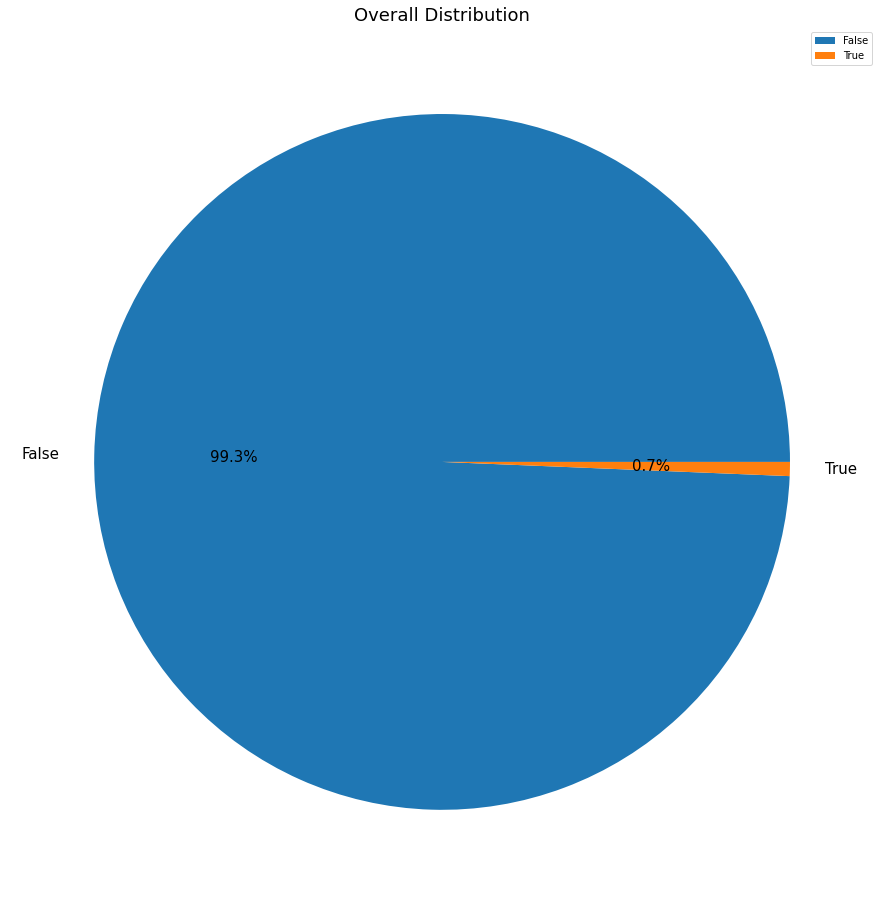

In [48]:
pie_chart1(df)

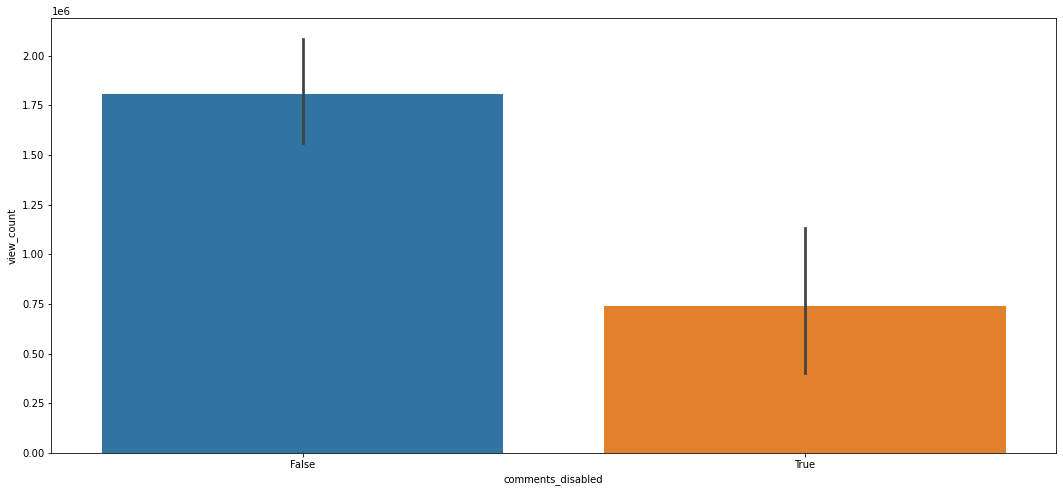

In [49]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='comments_disabled',y='view_count')
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Does comment count effect views per video

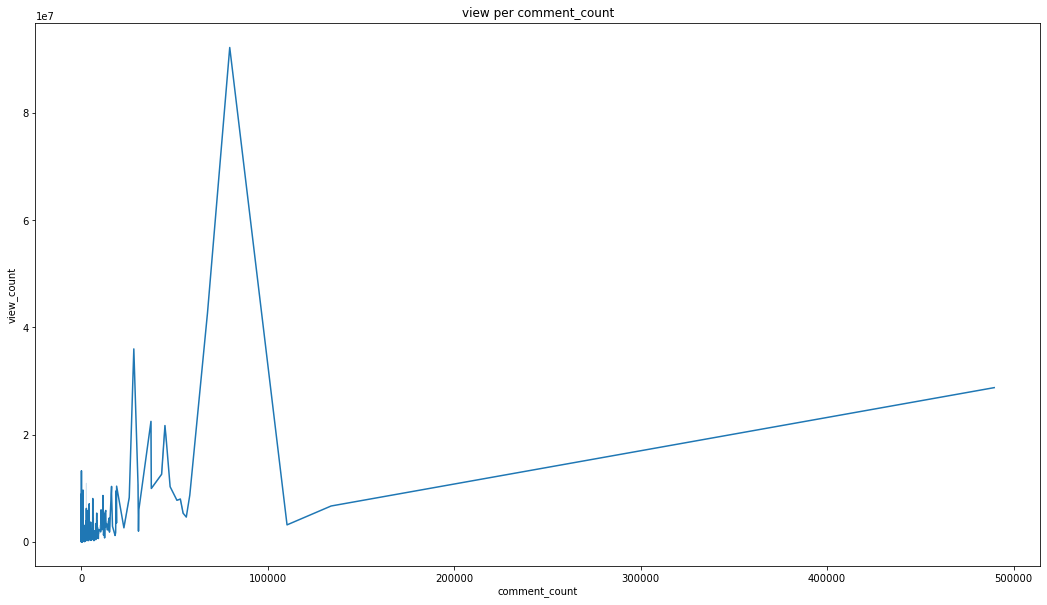

In [50]:
#the amount of comments effect the amoutn. of views 
df = df[~df.index.duplicated()]
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count')
plt.title('view per comment_count')
plt.show()

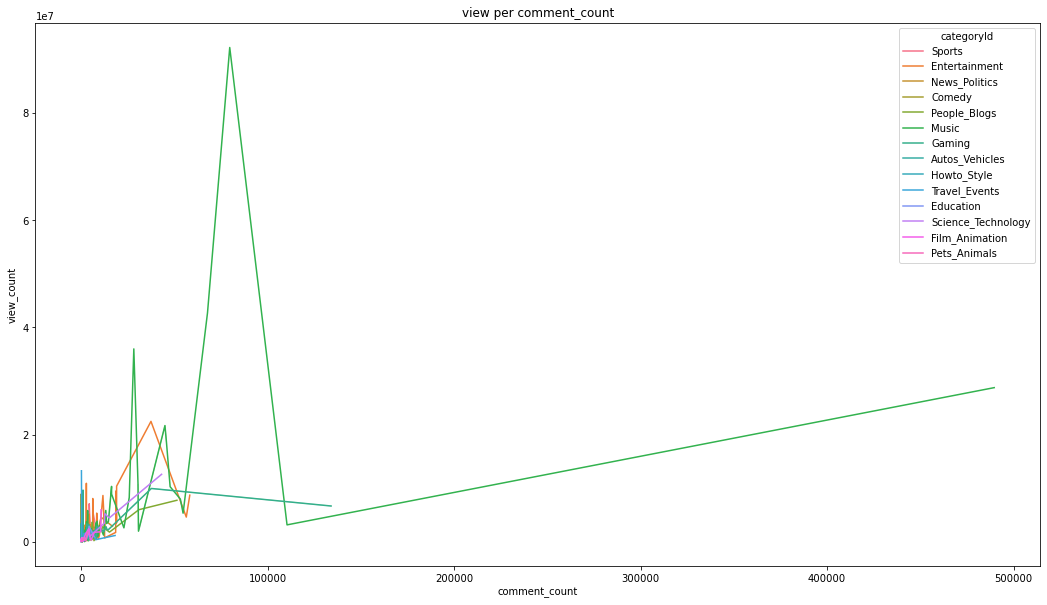

In [51]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count',hue='categoryId')
plt.title('view per comment_count')
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# rating disabled effect views:

In [52]:
def pie_chart2(df):
    labels = pd.concat([df.ratings_disabled.value_counts(),df.ratings_disabled.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['ratings_disabled']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

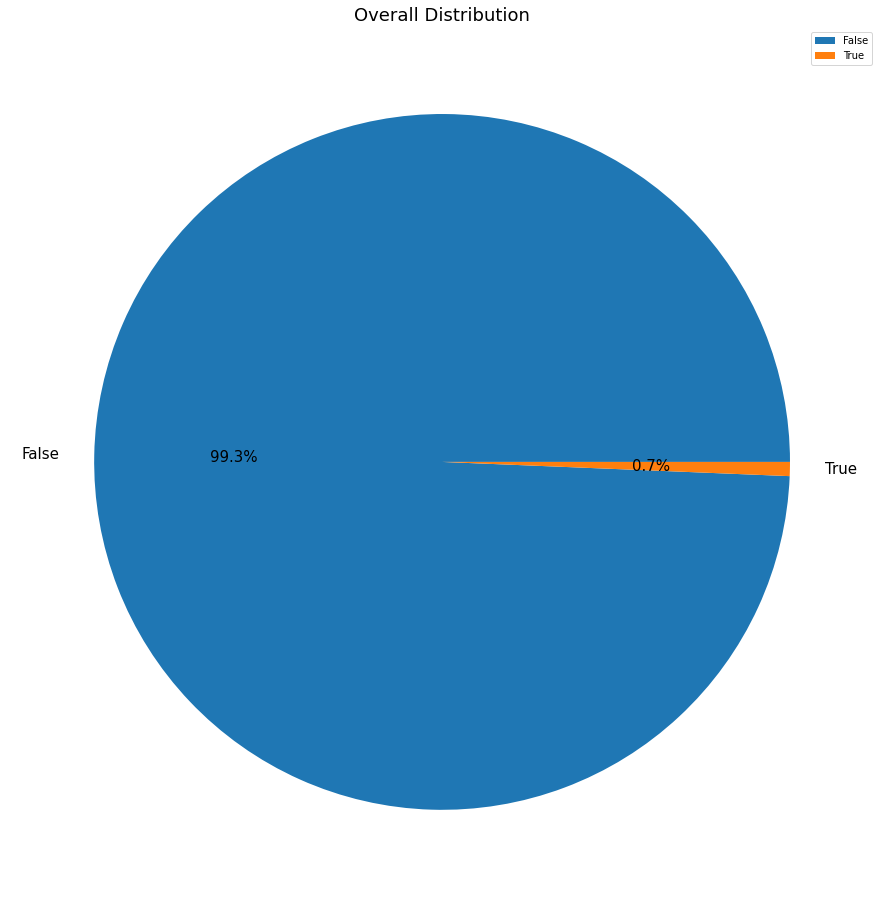

In [53]:
pie_chart2(df)

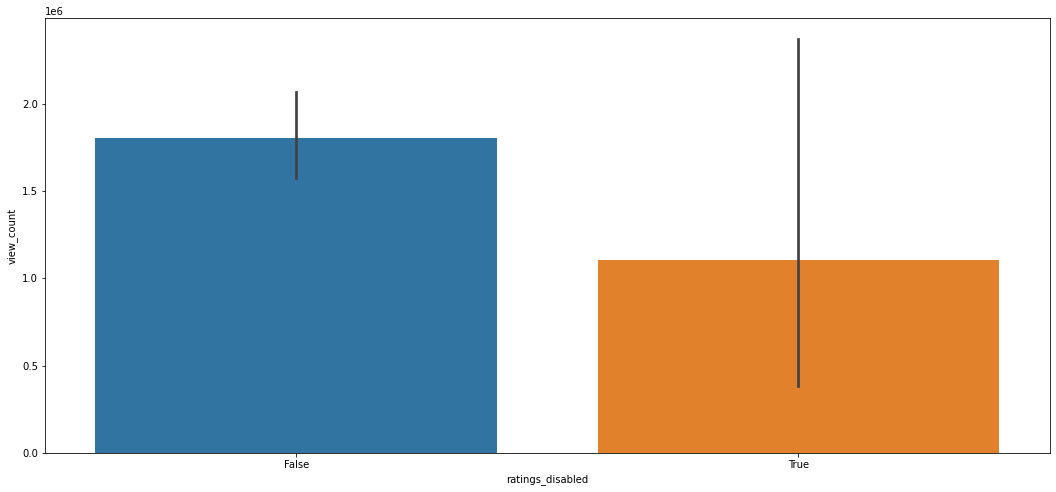

In [54]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='ratings_disabled',y='view_count')
plt.show()

In [55]:
df.ratings_disabled.nunique()

2

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# categoryId to views... 
# Which video category has the largest number of trending videos?

In [56]:
#type of categorys
df.categoryId.unique()

array(['Sports', 'Entertainment', 'News_Politics', 'Comedy',
       'People_Blogs', 'Music', 'Gaming', 'Autos_Vehicles', 'Howto_Style',
       'Travel_Events', 'Education', 'Science_Technology',
       'Film_Animation', 'Pets_Animals'], dtype=object)

In [57]:
#making categorid into actual category titles
# df.categoryId = df.categoryId.map({10: 'Music', 25: 'News_Politics', 20:'Gaming',24:'Entertainment',
#                                       17:'Sports',23:'Comedy',22:'People_Blogs',1:'Film_Animation',28:'Science_Technology',
#                                       2:'Autos_Vehicles',19:'Travel_Events',26:'Howto_Style',27:'Education'})

In [58]:
df.categoryId.unique()

array(['Sports', 'Entertainment', 'News_Politics', 'Comedy',
       'People_Blogs', 'Music', 'Gaming', 'Autos_Vehicles', 'Howto_Style',
       'Travel_Events', 'Education', 'Science_Technology',
       'Film_Animation', 'Pets_Animals'], dtype=object)

In [59]:
def pie_chart2(df):
    labels = pd.concat([df.categoryId.value_counts(),df.categoryId.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['categoryId']
    textprops = {"fontsize":12}
    textprops = {"fontsize":12}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend(loc='lower left')
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

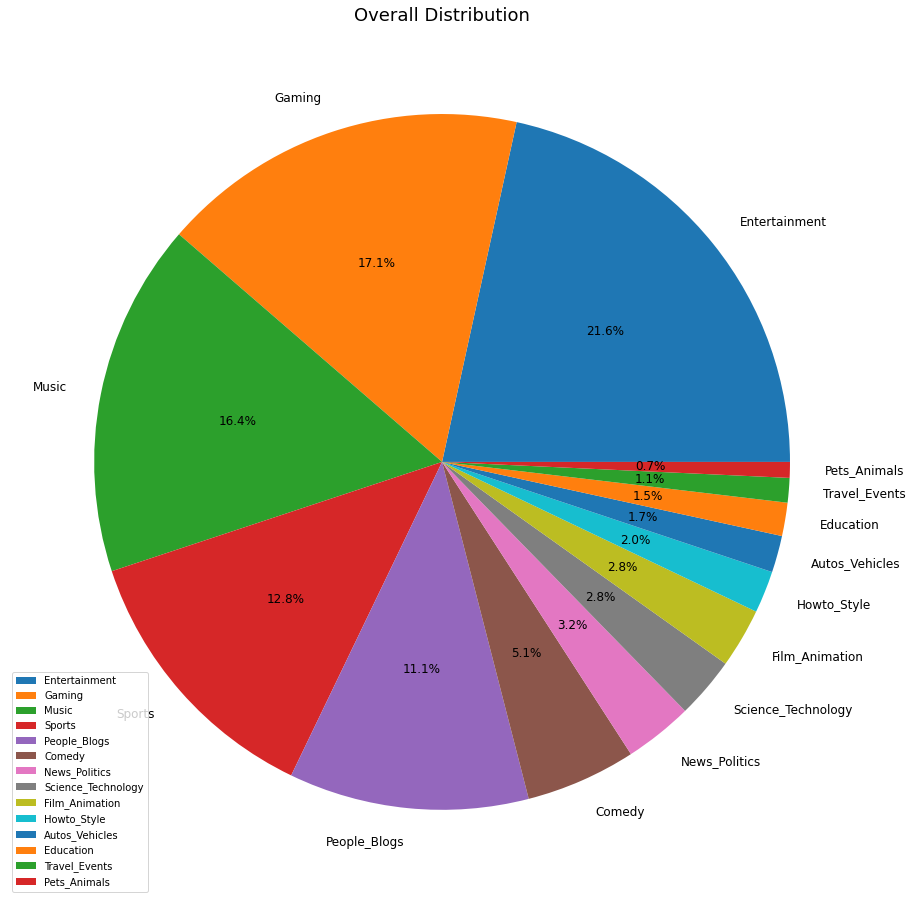

In [60]:
#overall count of category
pie_chart2(df)

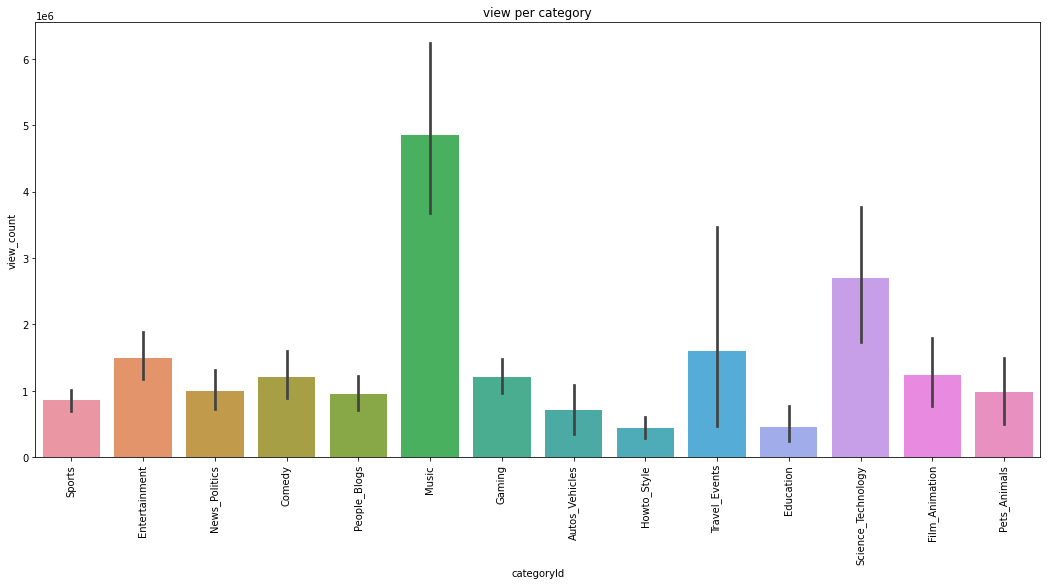

In [61]:
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

In [62]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 10,rotation=90)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12,rotation=90)
        
# def pie_chart1(df):
#     labels = pd.concat([df.clean_lang.value_counts(),df.clean_lang.value_counts(normalize=True)], axis=1)
#     labels.columns = ['n', 'percent']
#     plt.figure(figsize=(16,16))
#     mylabels = df['clean_lang']
#     textprops = {"fontsize":15}
#     textprops = {"fontsize":15}
#     plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
#     plt.legend()
#     plt.title('Overall Language Distribution',fontsize=18)
#     plt.show() 
    

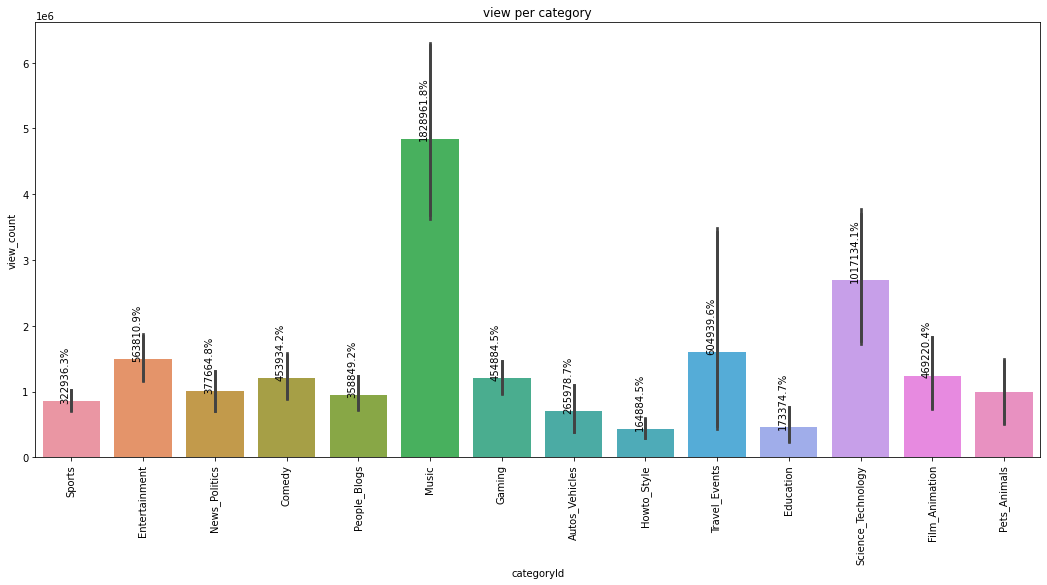

In [63]:
#fix the percentages
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
ax=sns.barplot(data=df,x='categoryId',y='view_count')
with_hue(ax, df.categoryId,1,13)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# duration effecct view count !
# Does that information change based on length, category, and global region?


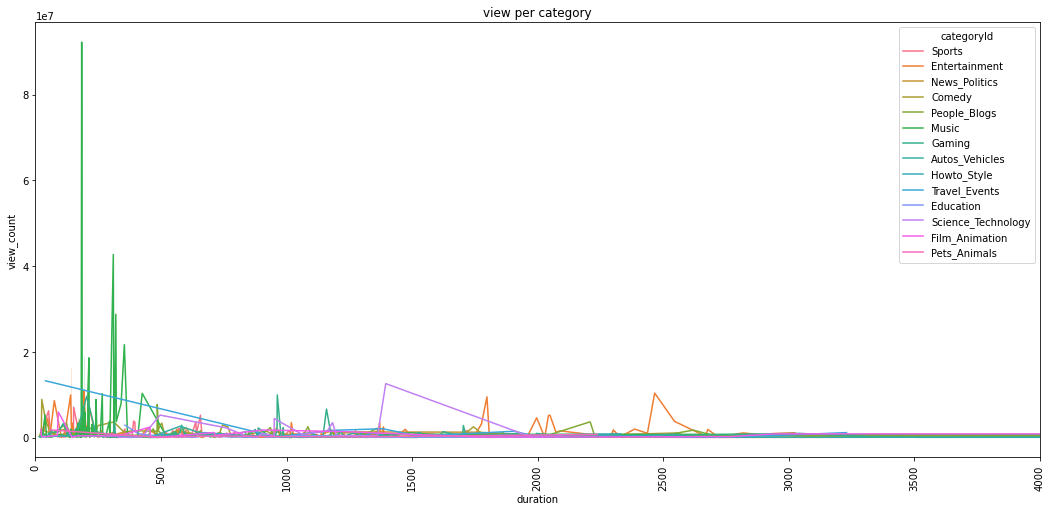

In [64]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df,x='duration',y='view_count',hue='categoryId')
plt.title('view per category')
plt.xticks(rotation=90)
plt.xlim(0,4000)
plt.show()

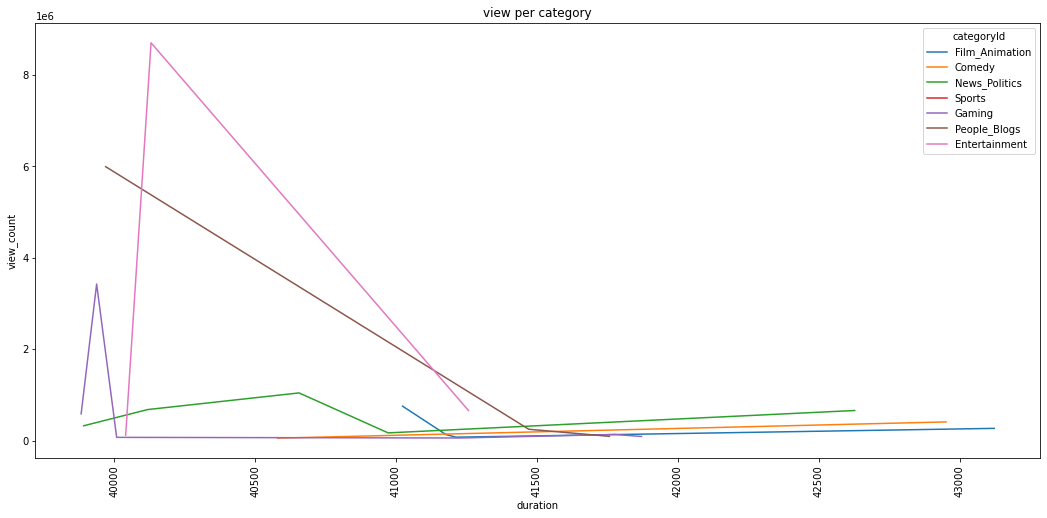

In [65]:
#top 25 rank videos
plt.figure(figsize=(18,8))
sns.lineplot(
    x='duration',
    y='view_count',
    hue='categoryId',
    data=df.nlargest(25, 'duration'))
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_15639/3005040862.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])


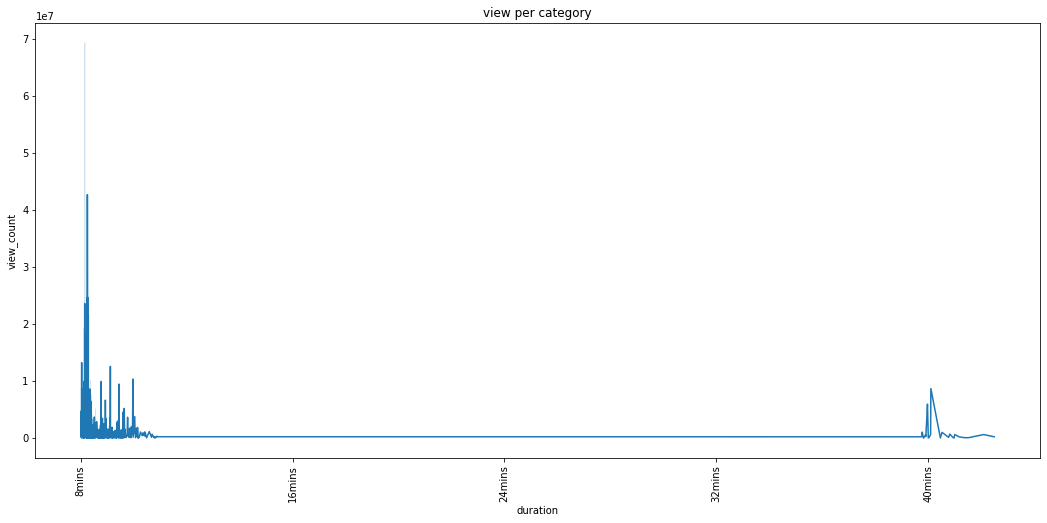

In [66]:
plt.figure(figsize=(18,8))
g=sns.lineplot(data=df,x='duration',y='view_count')
plt.title('view per category')
g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])
plt.xticks(rotation=90)
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# What is a viral video? How long does it a take for a video to go viral?Create feature based on virality

In [67]:
df.head(10)

,index,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,duration,captions,region,rank,age,engagement,sponsored
0,0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-31 00:00:00+00:00,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,...,False,False,See the highlights from Jake Paul vs Anderson ...,245,False,ca,1,2.478056,0.02004,0
400,0,MgMBMvCvME4,Tyson Fury LOSES IT with True Geordie Over Chi...,2022-10-30 19:34:07+00:00,True Geordie,Sports,2022-10-31 00:00:00+00:00,Tyson Fury|Anthony Joshua|matchroom boxing|Edd...,761980,44508,...,False,False,In today’s episode of the True Geordie podcast...,1047,False,gb,2,4.431389,0.105068,0
600,0,K5MPVfVpI7A,2022年 天皇賞（秋）（GⅠ） | 第166回 | JRA公式,2022-10-30 07:29:50+00:00,JRA公式チャンネル,Sports,2022-10-31 00:00:00+00:00,JRA|日本中央競馬会|競馬|GⅠ|GⅡ|GⅢ|レース|乗馬|競走馬|WINS|JpnⅠ|重...,581089,8049,...,True,False,【レース概要】2022年10月30日（日曜）4回東京9日 発走時刻：15時40分天候 晴芝 ...,143,False,jp,3,16.502778,0.013852,0
650,0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-10-31 00:00:00+00:00,아는 형님|형님|형님 학교|미연|민니|소연|우기|슈화|아이들|여자아이들|강호동|이수...,765600,15295,...,False,False,[아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토크 모음....,1281,True,kr,4,34.554444,0.023348,0
850,0,g9PSN5UBgdM,24 Часа в МАЙБАХЕ !,2022-10-31 09:00:25+00:00,A4,Entertainment,2022-10-31 00:00:00+00:00,24 Часа в МАЙБАХЕ !|24 часа на майбахе|Майбах|...,4618374,508038,...,False,False,В этом ролике мы провели 24 Часа в МАЙБАХЕ ! С...,1996,False,ru,5,-9.006944,0.15884,0
1029,0,lVxm9Cuc5RY,"Jake Paul KNOCKS DOWN Anderson Silva late, win...",2022-10-30 07:04:52+00:00,CBS Sports HQ,Sports,2022-10-31 00:00:00+00:00,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,368933,2708,...,False,False,Brian Campbell joins CBS Sports HQ to break do...,567,False,us,6,16.918889,0.028114,0
750,0,X73IrWyGAQw,Pachuca vs Toluca | Resumen de la final del Ap...,2022-10-31 03:56:52+00:00,Marca Claro,Sports,2022-10-31 00:00:00+00:00,Deportes|Videos de deportes|MARCAClaro|MARCA C...,466314,4678,...,False,False,El Pachuca terminó con la tarea y finiquitó al...,811,False,mx,7,-3.947778,0.014647,0
200,0,c13Wd-LIVNE,7 vs. Wild - Behind the Scenes,2022-10-30 11:00:08+00:00,DAVE,Entertainment,2022-10-31 00:00:00+00:00,Dave|7 vs. Wild|Behind the Scenes|Staffel 2|Fr...,922698,102462,...,False,False,7vs.Wild Staffel 1 ist das größte YouTube Crea...,612,False,de,8,12.997778,0.122118,0
201,1,Su_eagxxa1c,Das Jawort sorgt für Tränen - Michaela & Olive...,2022-10-30 13:00:13+00:00,Hochzeit auf den ersten Blick,Entertainment,2022-10-31 00:00:00+00:00,Hochzeit auf den ersten Blick|Hochzeit|Heirate...,321275,320,...,False,False,*Empfohlen ab 12 Jahren*Endlich ist sie da!: A...,406,False,de,9,10.996389,0.001345,0
601,1,RTmg_MunJag,【速報】ソウル、雑踏事故で151人死亡 ハロウィーンで若者密集,2022-10-30 02:52:55+00:00,KYODO NEWS,News_Politics,2022-10-31 00:00:00+00:00,共同通信|KYODO NEWS|韓国|ソウル|繁華街|梨泰院|ハロウィーン|若者|転倒|事故...,1872841,2561,...,True,False,韓国の首都ソウルの繁華街・梨泰院(イテウォン)でハロウィーンのために集まった多数の若者らが2...,22,False,jp,10,21.118056,0.001367,0


In [68]:
df.publishedAt.nunique()

889

(19288.656255208334, 19297.656255208334)

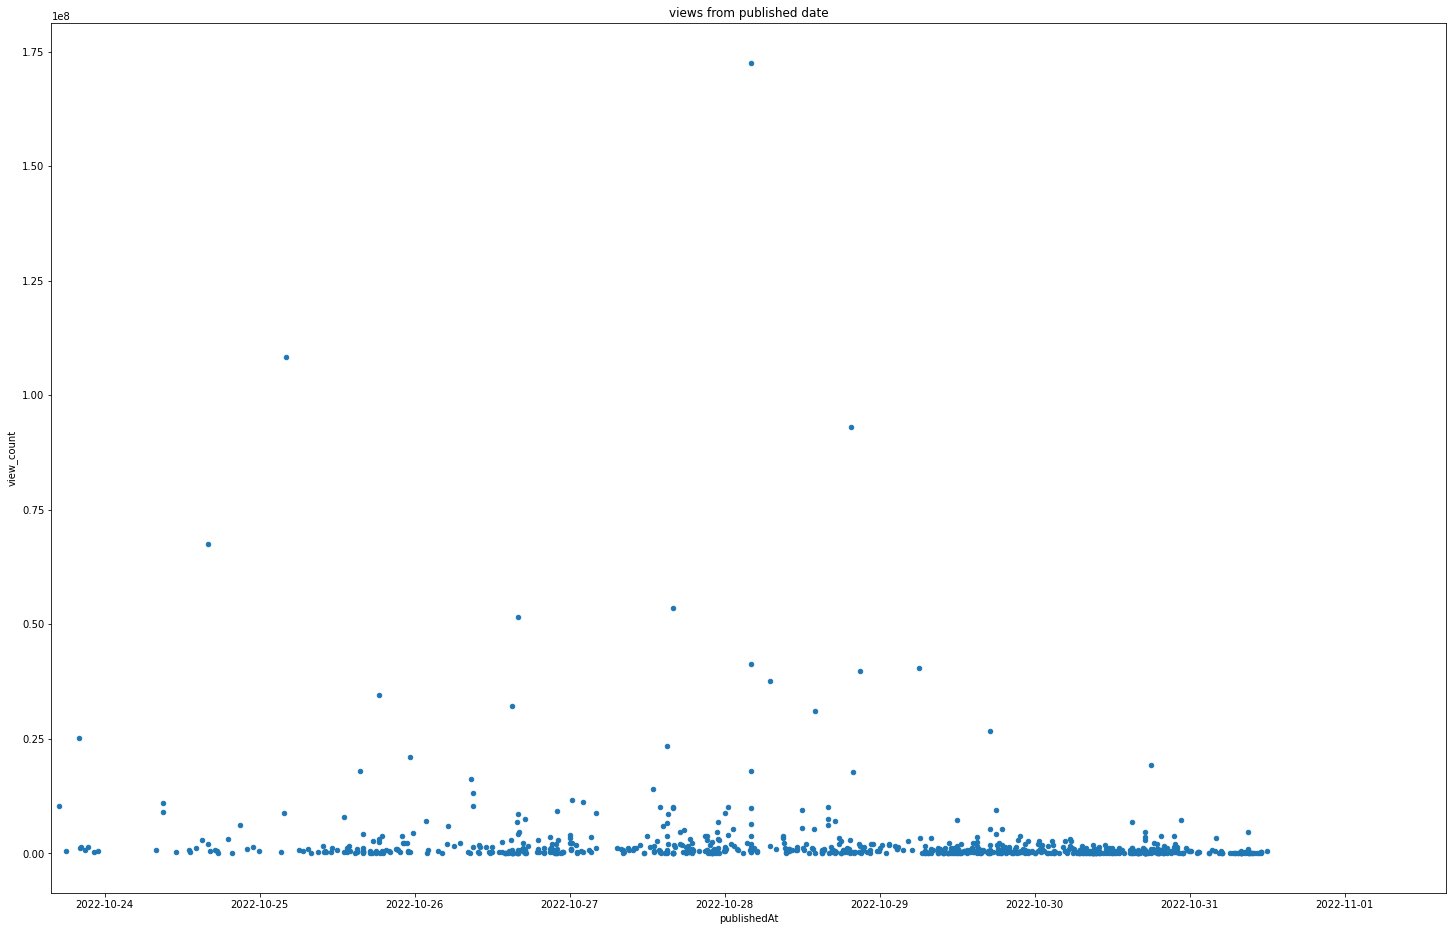

In [69]:
plt.rcParams["figure.figsize"] = (25,16)
publisheds = df.groupby('publishedAt')['view_count'].sum().reset_index()
publisheds.plot(kind='scatter', x='publishedAt', y='view_count', title='views from published date')
plt.xlim(19288.656255208334,19297.656255208334)

<AxesSubplot:title={'center':'views from published date'}, xlabel='publishedAt', ylabel='view_count'>

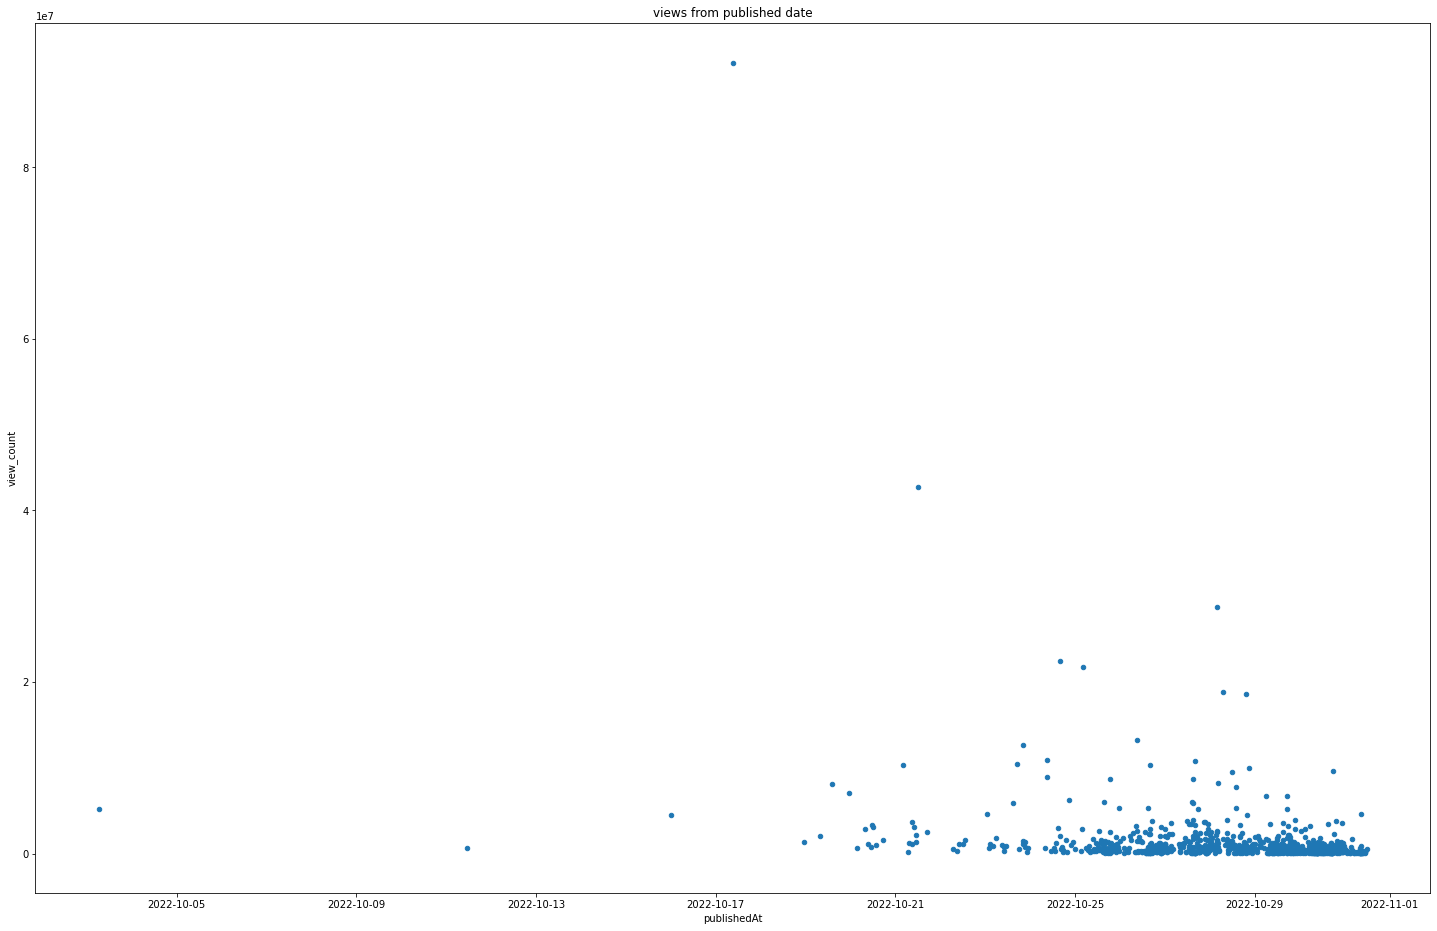

In [70]:
plt.rcParams["figure.figsize"] = (25,16)
publisheds = df.groupby('publishedAt')['view_count'].mean().reset_index()
publisheds.plot(kind='scatter', x='publishedAt', y='view_count', title='views from published date')

In [71]:
df[['publishedAt']].sort_values(by='publishedAt')

,publishedAt
73,2022-10-03 06:30:12+00:00
940,2022-10-11 11:00:29+00:00
945,2022-10-16 00:00:53+00:00
730,2022-10-17 09:04:23+00:00
743,2022-10-18 23:00:23+00:00
...,...
899,2022-10-31 11:00:02+00:00
867,2022-10-31 11:00:16+00:00
881,2022-10-31 11:00:25+00:00
902,2022-10-31 11:00:32+00:00


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Is rank effect by view count??:

In [72]:
#TREN 
# plt.rcParams["figure.figsize"] = (25,16)
# new_Greenland = df.groupby('trending_date')['view_count'].mean().reset_index()
# new_Greenland.plot(kind='line', x='trending_date', y='view_count', title='views from published date')

<AxesSubplot:xlabel='view_count', ylabel='rank'>

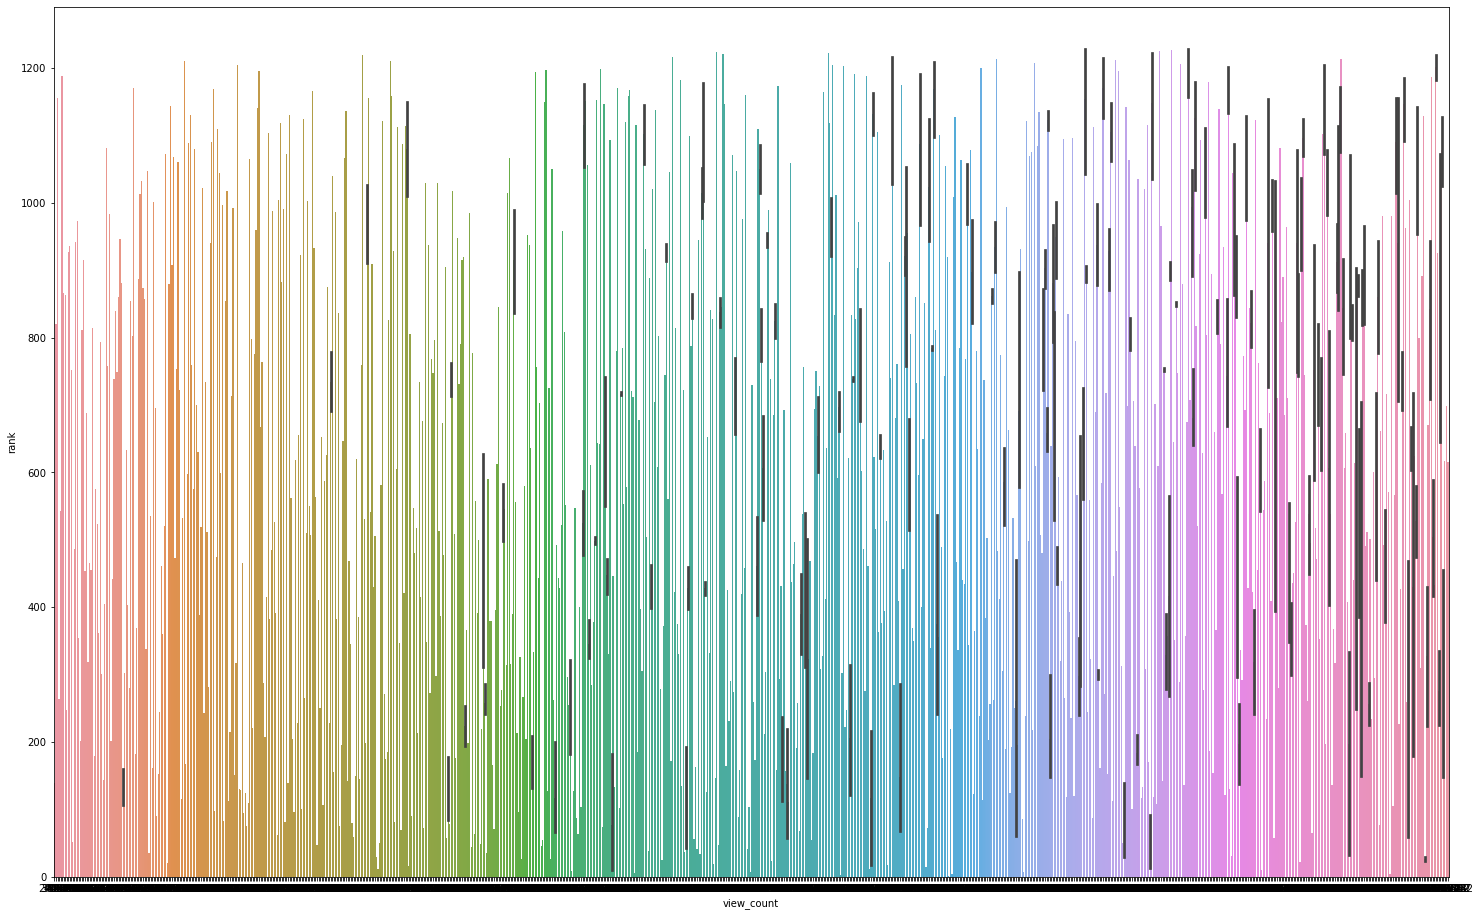

In [73]:
sns.barplot(data=df,x='view_count',y='rank')

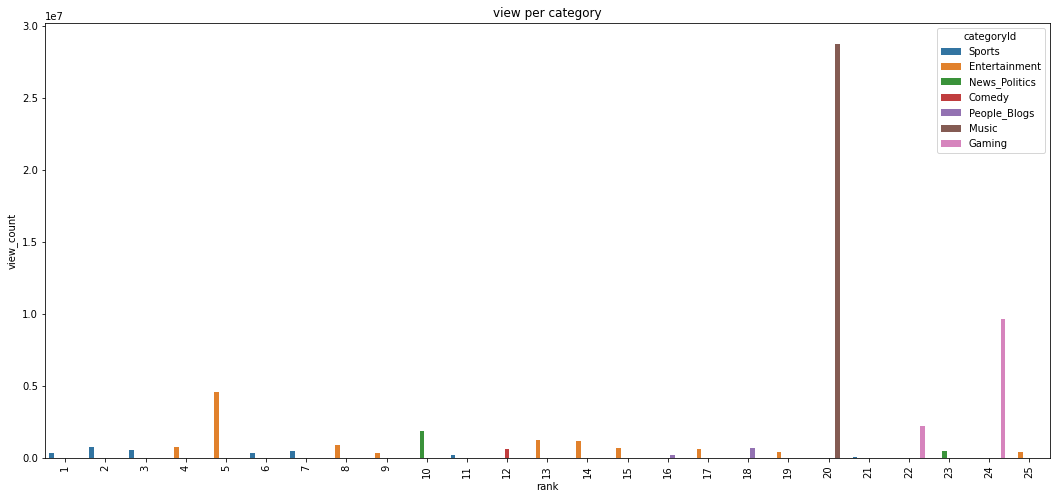

In [74]:
plt.figure(figsize=(18,8))
sns.barplot(
    x='rank',
    y='view_count',
    hue='categoryId',
    data=df.sort_values('rank', ascending=True).head(25))
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Common words on top 25 videos:

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk
def remove_stopwords(article_processed,words_to_add=[],words_to_remove=[]):
    ''' 
    takes in string, and two lists
    creates list of words to remove from nltk, modifies as dictated in arguements
    prints result of processing
    returns resulting string
    '''
    from nltk.corpus import stopwords
    #create the stopword list
    stopwords_list = stopwords.words("english")
    #modify stopword list
    [stopwords_list.append(word) for word in words_to_add]
    [stopwords_list.remove(word) for word in words_to_remove]
    #remove using stopword list
    words = article_processed.split()
    filtered_words = [w for w in words if w not in stopwords_list]
    #filtered_words =[word for word in article_processed if word not in stopwords_list]
    #print("removed ",len(article_processed)-len(filtered_words), "words")
    #join back
    article_without_stopwords = " ".join(filtered_words)
    return article_without_stopwords

def lemmatize(article):
    ''' 
    input article
    makes object, applies to string, and returns results
    '''
    import nltk
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    #use lemmatizer
    lemmatized = [wnl.lemmatize(word) for word in article.split()]
    #join words back together
    article_lemmatized = " ".join(lemmatized)
    return article_lemmatized

def stem(article):
    ''' 
    input string
    create object, apply it to the each in string, rejoin and return
    '''
    import nltk
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in article.split()]
    #join words back together
    article_stemmed = " ".join(stems)
    return article_stemmed

def tokenize(article0):
    ''' 
    input string
    creates object, returns string after object affect
    '''
    import nltk
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    article = tokenize.tokenize(article0,return_str=True)
    return article

def basic_clean(article0):
    ''' 
    input string
    lowers cases, makes "normal" characters, and removes anything not expected
    returns article
    '''
    import unicodedata
    import re
    #lower cases
    if isinstance(article0, float):
        article = str(article0).lower()
    else:
        article = article0.lower()
    ## decodes to change to "normal" characters after encoding to ascii from a unicode normalize
    article = unicodedata.normalize("NFKD",article).encode("ascii","ignore").decode("utf-8")
    # removes anything not lowercase, number, single quote, or a space
    article = re.sub(r'[^a-z0-9\'\s]','',article)
    return article



In [76]:
# cleaning the data for world cloud
df = df[df.description.isna()==False]
df["clean"] = [remove_stopwords(tokenize(basic_clean(each))) for each in df.description]
df["stemmed"] = df.clean.apply(stem)
df["lemmatized"] = df.clean.apply(lemmatize)

In [77]:
df.head()

,index,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,...,duration,captions,region,rank,age,engagement,sponsored,clean,stemmed,lemmatized
0,0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-31 00:00:00+00:00,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,...,245,False,ca,1,2.478056,0.02004,0,see highlights jake paul vs anderson silva hig...,see highlight jake paul vs anderson silva high...,see highlight jake paul v anderson silva highl...
400,0,MgMBMvCvME4,Tyson Fury LOSES IT with True Geordie Over Chi...,2022-10-30 19:34:07+00:00,True Geordie,Sports,2022-10-31 00:00:00+00:00,Tyson Fury|Anthony Joshua|matchroom boxing|Edd...,761980,44508,...,1047,False,gb,2,4.431389,0.105068,0,todays episode true geordie podcast brian inte...,today episod true geordi podcast brian intervi...,today episode true geordie podcast brian inter...
600,0,K5MPVfVpI7A,2022年 天皇賞（秋）（GⅠ） | 第166回 | JRA公式,2022-10-30 07:29:50+00:00,JRA公式チャンネル,Sports,2022-10-31 00:00:00+00:00,JRA|日本中央競馬会|競馬|GⅠ|GⅡ|GⅢ|レース|乗馬|競走馬|WINS|JpnⅠ|重...,581089,8049,...,143,False,jp,3,16.502778,0.013852,0,2022103049 1540 11166 gi2000 1 2 3 4 5 6 7 c8 ...,2022103049 1540 11166 gi2000 1 2 3 4 5 6 7 c8 ...,2022103049 1540 11166 gi2000 1 2 3 4 5 6 7 c8 ...
650,0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-10-31 00:00:00+00:00,아는 형님|형님|형님 학교|미연|민니|소연|우기|슈화|아이들|여자아이들|강호동|이수...,765600,15295,...,1281,True,kr,4,34.554444,0.023348,0,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...,5 5 zip httpstvjtbccokrjtbcbro httpstvingoneli...,5 5 zip httpstvjtbccokrjtbcbros httpstvingonel...
850,0,g9PSN5UBgdM,24 Часа в МАЙБАХЕ !,2022-10-31 09:00:25+00:00,A4,Entertainment,2022-10-31 00:00:00+00:00,24 Часа в МАЙБАХЕ !|24 часа на майбахе|Майбах|...,4618374,508038,...,1996,False,ru,5,-9.006944,0.15884,0,24 teslatraderu 4 httpsa4shopru telegram https...,24 teslatraderu 4 httpsa4shopru telegram https...,24 teslatraderu 4 httpsa4shopru telegram https...


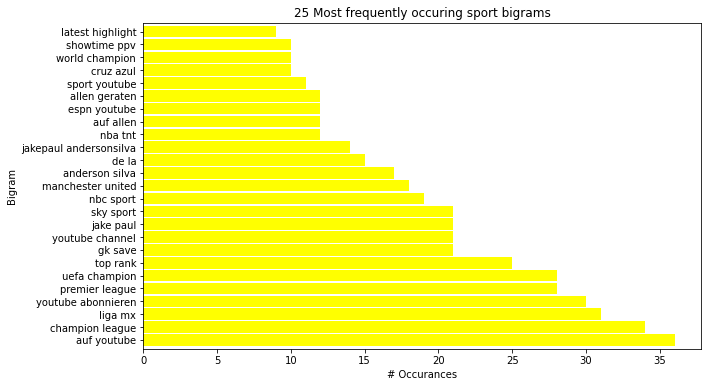

In [78]:
Sports = ' '.join(df[df.categoryId == 'Sports'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Sports, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='yellow', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring sport bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

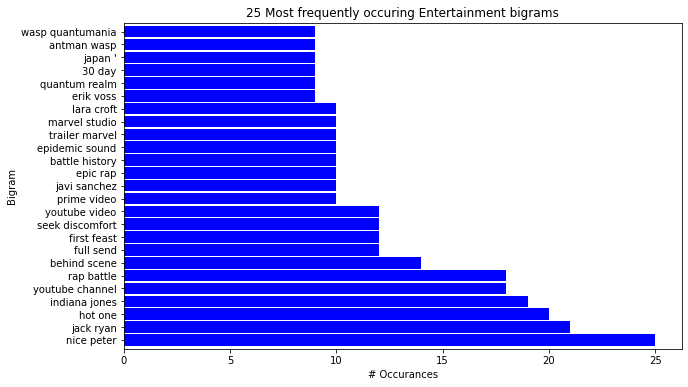

In [79]:
Ruby = ' '.join(df[df.categoryId == 'Entertainment'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

[]

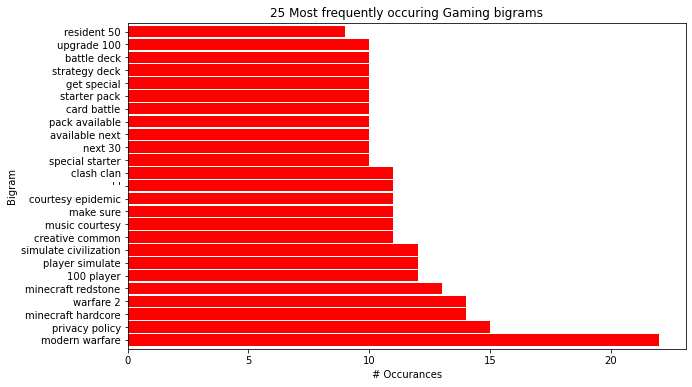

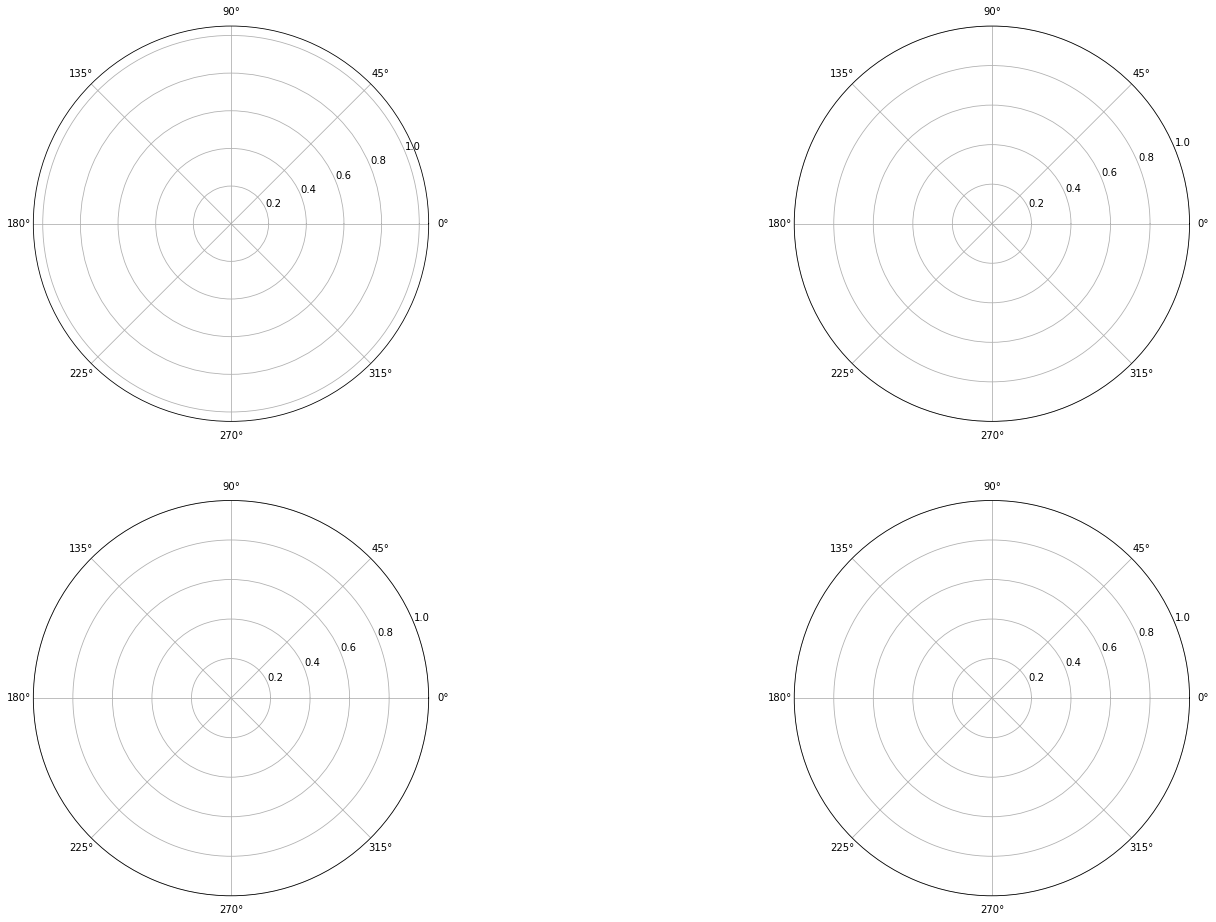

In [80]:
Ruby = ' '.join(df[df.categoryId == 'Gaming'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Gaming bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot()

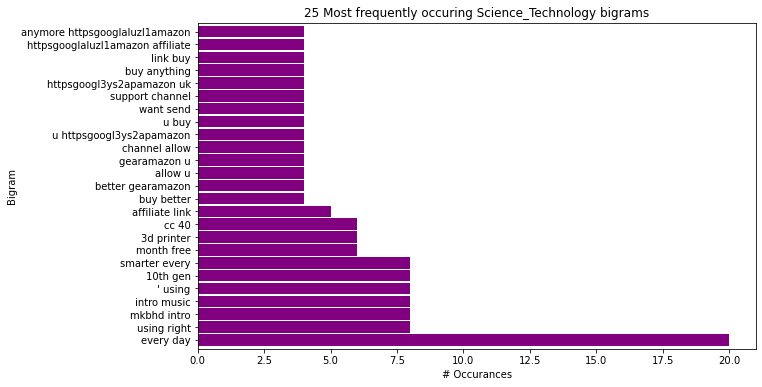

In [81]:
Ruby = ' '.join(df[df.categoryId == 'Science_Technology'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Science_Technology bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Comparing like from all categorys to other caregorys

In [82]:
def explore_ttest_lang_setcount(df,population_name="categoryId",numerical_feature="likes"):
    ''' 
    input df dataset and two strings (discrete and continous)
    does a ttest prints results, plots relation
    returns nothing
    '''
    
    #plot the results
    plt.figure(figsize=(25,25))
    plt.suptitle(f"Sample Values Compared for Non-Repeating Words", fontsize=12, y=0.99)
    i=0
    for feature in df[population_name].unique():
        temp1=df.copy()
        #plots out a grouping of the features
        i+=1
        ax = plt.subplot(5,3,i)
        temp1[population_name] = np.where(temp1[population_name]==feature,feature,"Other categoryId")
        temp1[[numerical_feature,population_name]].groupby(population_name).agg("mean").plot.bar(rot=0,color="blue",edgecolor="white",linewidth=5,ax=ax)
        ax.axhline(y=temp1[numerical_feature].mean(),label=f"Mean {(round(temp1[numerical_feature].mean(),3))}",color="red",linewidth=3)
        ax.set_ylabel("% of Non-Repeating Words")
        plt.legend()
        ax.set_title(f"{feature} means for likes",fontsize=8)
    plt.show()

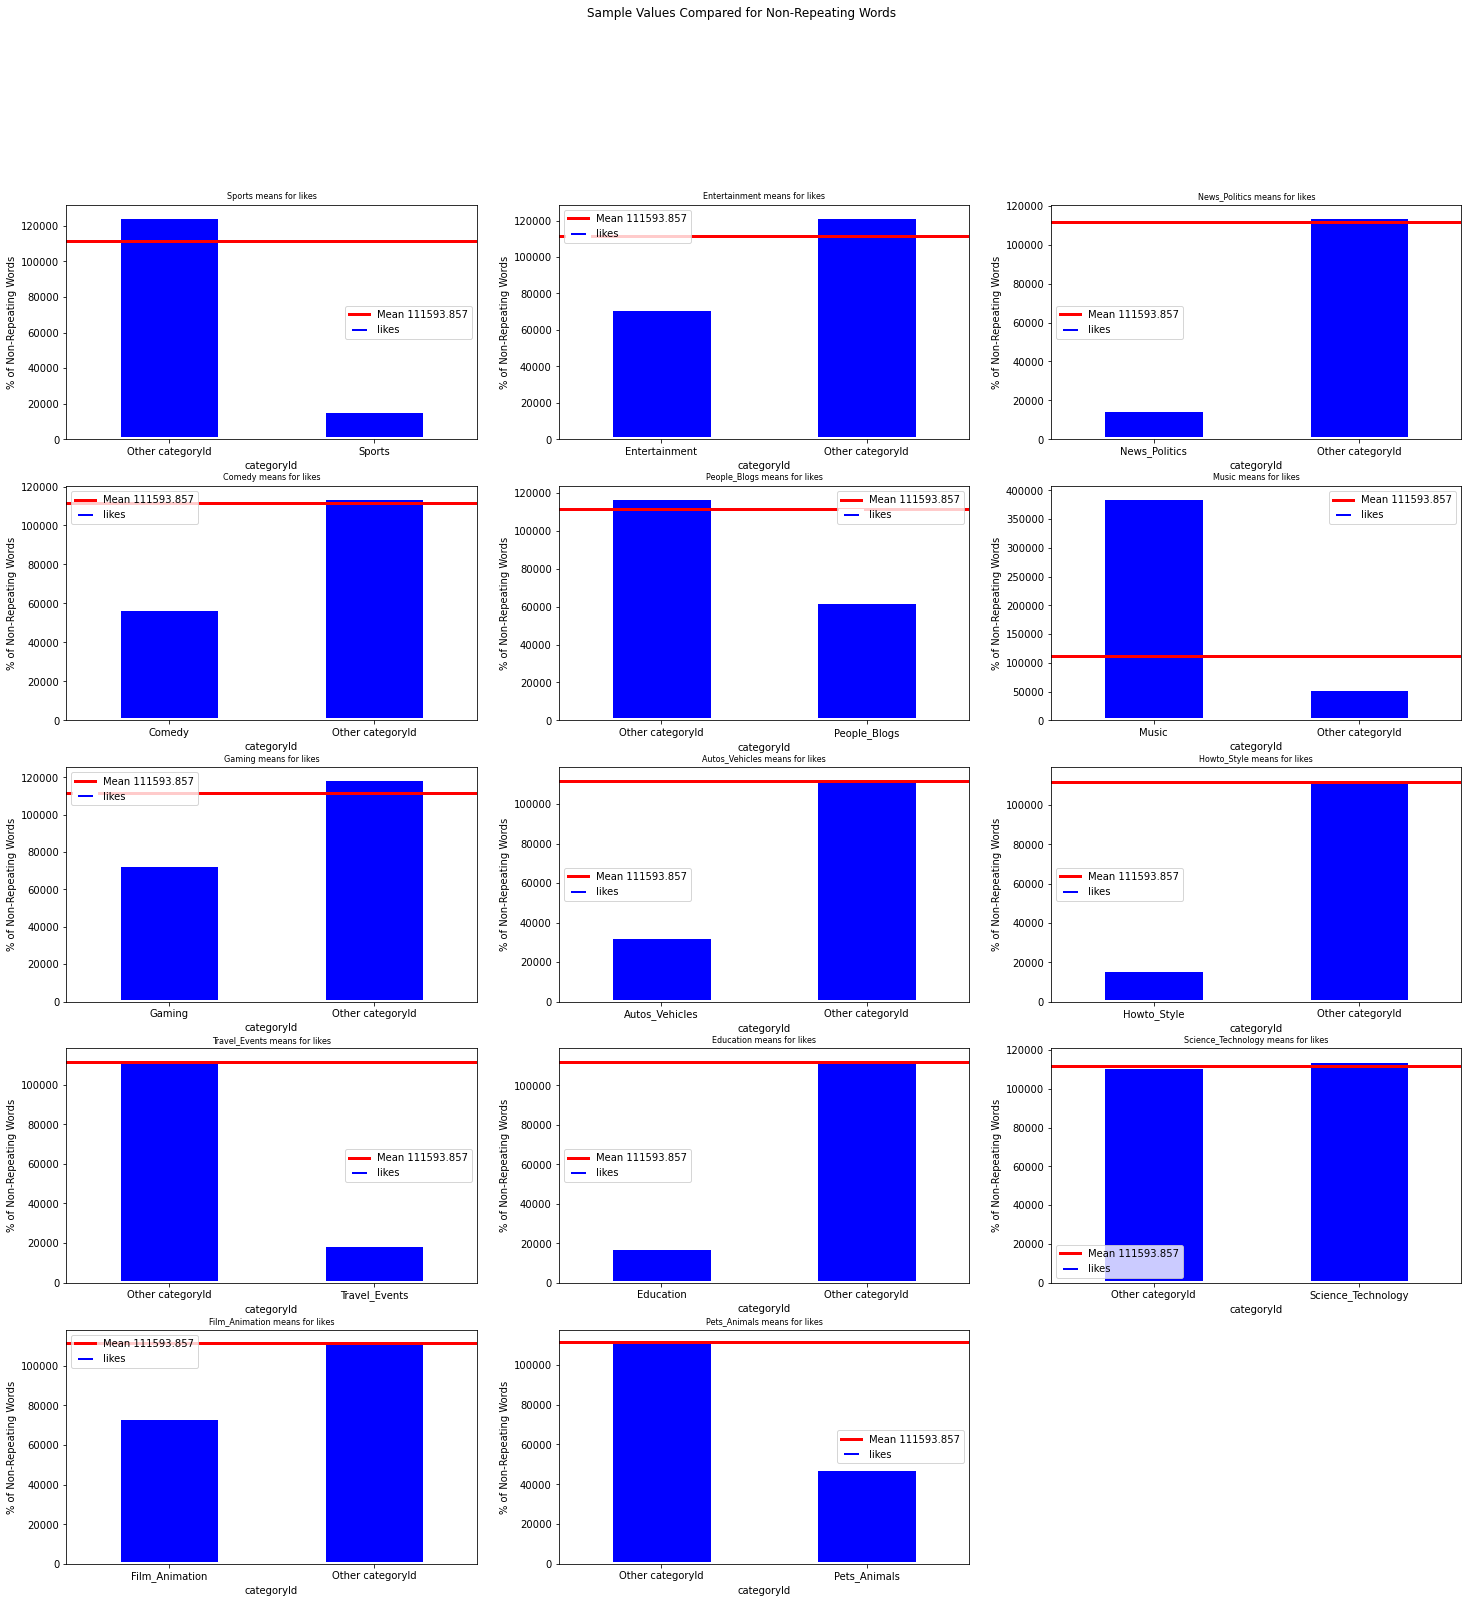

In [83]:
explore_ttest_lang_setcount(df)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# word count from all categoryId Obtain from lemmatized:

In [84]:
def graph2(df):
    lang_dict={"Language":[],"Words":[]}
    for lang in df["categoryId"].unique():
        lang_dict["Language"].append(lang)
        lang_dict["Words"].append((" ".join(df[df["categoryId"]==lang]["lemmatized"])).replace("'","").split())
    lang = pd.DataFrame(lang_dict)
    most_common_list=[]
    for i,each in enumerate(lang["Language"].unique()):
        looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
        most_common = looped_series[looped_series > looped_series.quantile(.95)]
        most_common_list.append(most_common[:5].index.tolist())
    lang["most_common"] = pd.Series(most_common_list)
    lang["count_set_words"] = lang["Words"].apply(set).apply(len)
    sns.catplot(data=lang, x="count_set_words", y="Language", kind="bar",height=11,aspect=1.5)
    plt.title('Total count of words')
    plt.show()
    print(lang.count_set_words)

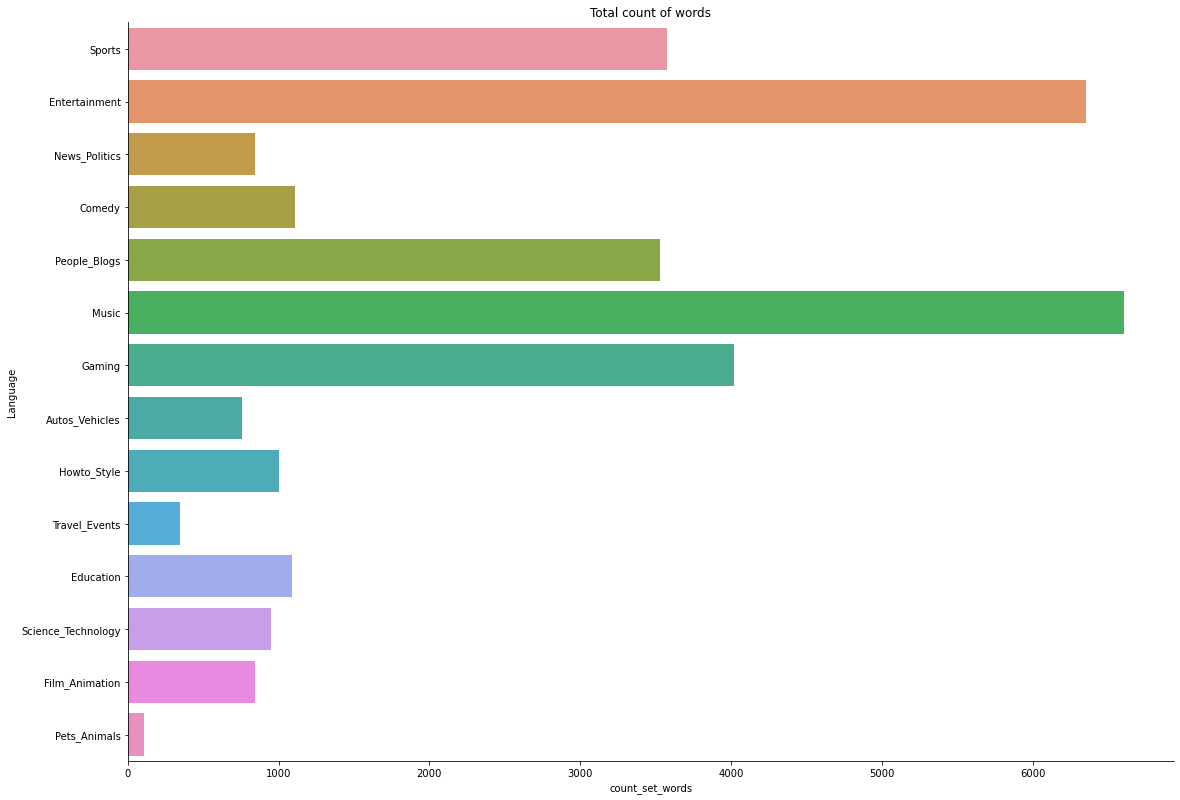

0     3576
1     6352
2      841
3     1108
4     3527
5     6604
6     4020
7      756
8     1000
9      346
10    1089
11     949
12     843
13     109
Name: count_set_words, dtype: int64


In [85]:
graph2(df)

In [86]:
def graph3(df):
    lang_dict={"Language":[],"Words":[]}
    for lang in df["categoryId"].unique():
        lang_dict["Language"].append(lang)
        lang_dict["Words"].append((" ".join(df[df["categoryId"]==lang]["lemmatized"])).replace("'","").split())
    lang = pd.DataFrame(lang_dict)
    most_common_list=[]
    for i,each in enumerate(lang["Language"].unique()):
        looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
        most_common = looped_series[looped_series > looped_series.quantile(.95)]
        most_common_list.append(most_common[:5].index.tolist())
    lang["most_common"] = pd.Series(most_common_list)
    lang["count_set_words"] = lang["Words"].apply(set).apply(len)
    sns.pointplot(data=lang, x="count_set_words", y="Language",errorbar=("pi", 100), capsize=.4, join=True, color=".5",)
    plt.title('Total count of words')
    plt.show()
    print(lang.count_set_words)

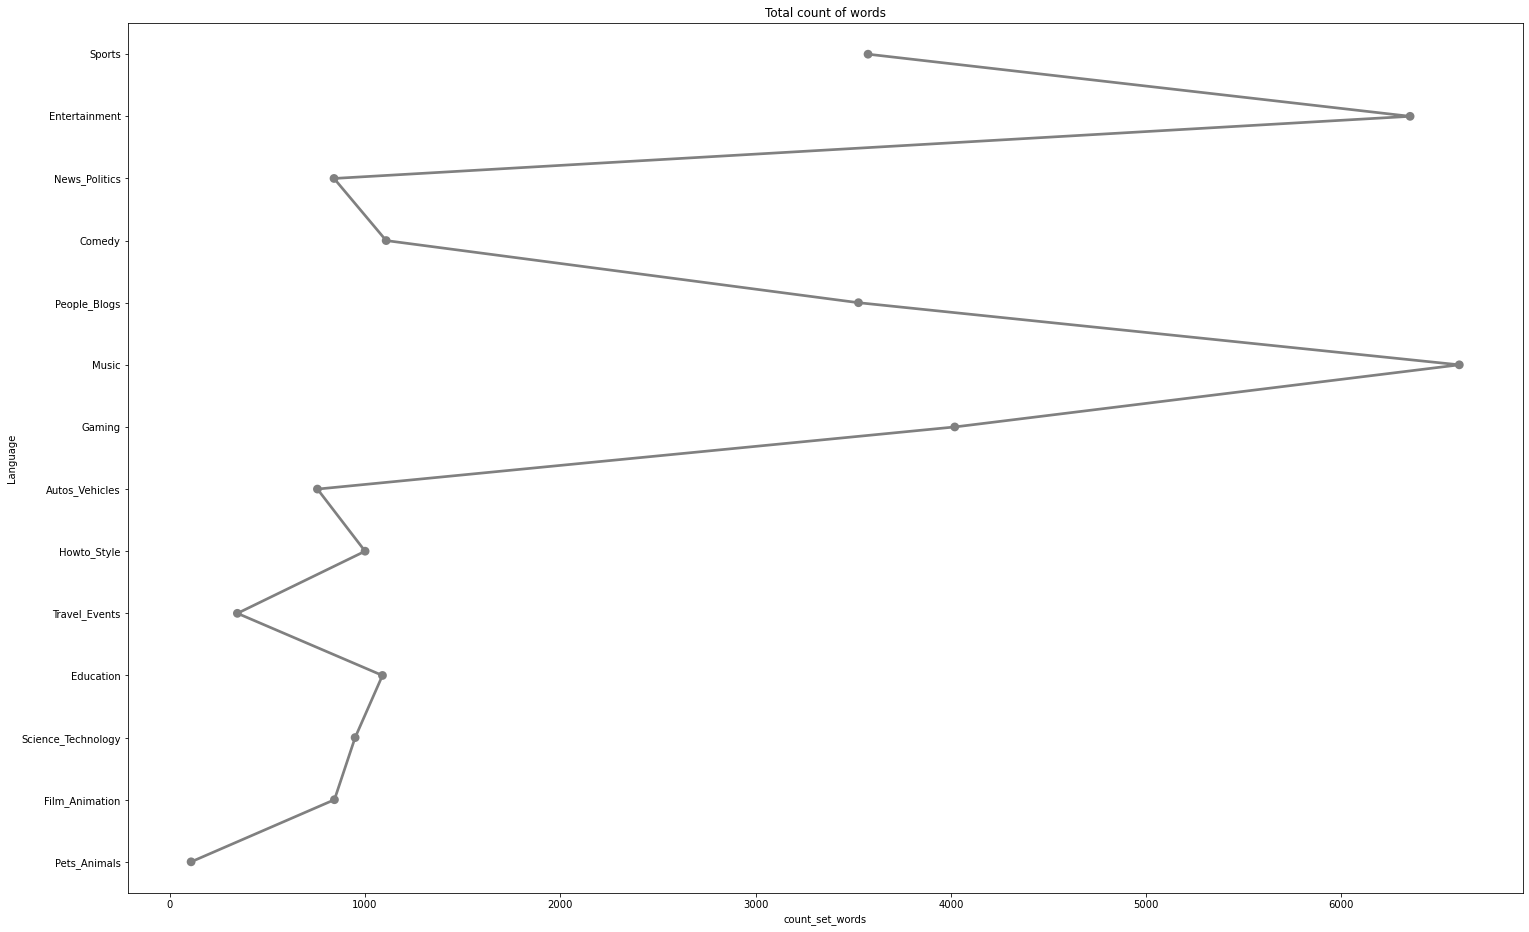

0     3576
1     6352
2      841
3     1108
4     3527
5     6604
6     4020
7      756
8     1000
9      346
10    1089
11     949
12     843
13     109
Name: count_set_words, dtype: int64


In [87]:
graph3(df)

In [88]:
df.region.nunique()

8

# Checking different kind of regions

<AxesSubplot:title={'center':'view per category'}, xlabel='categoryId', ylabel='view_count'>

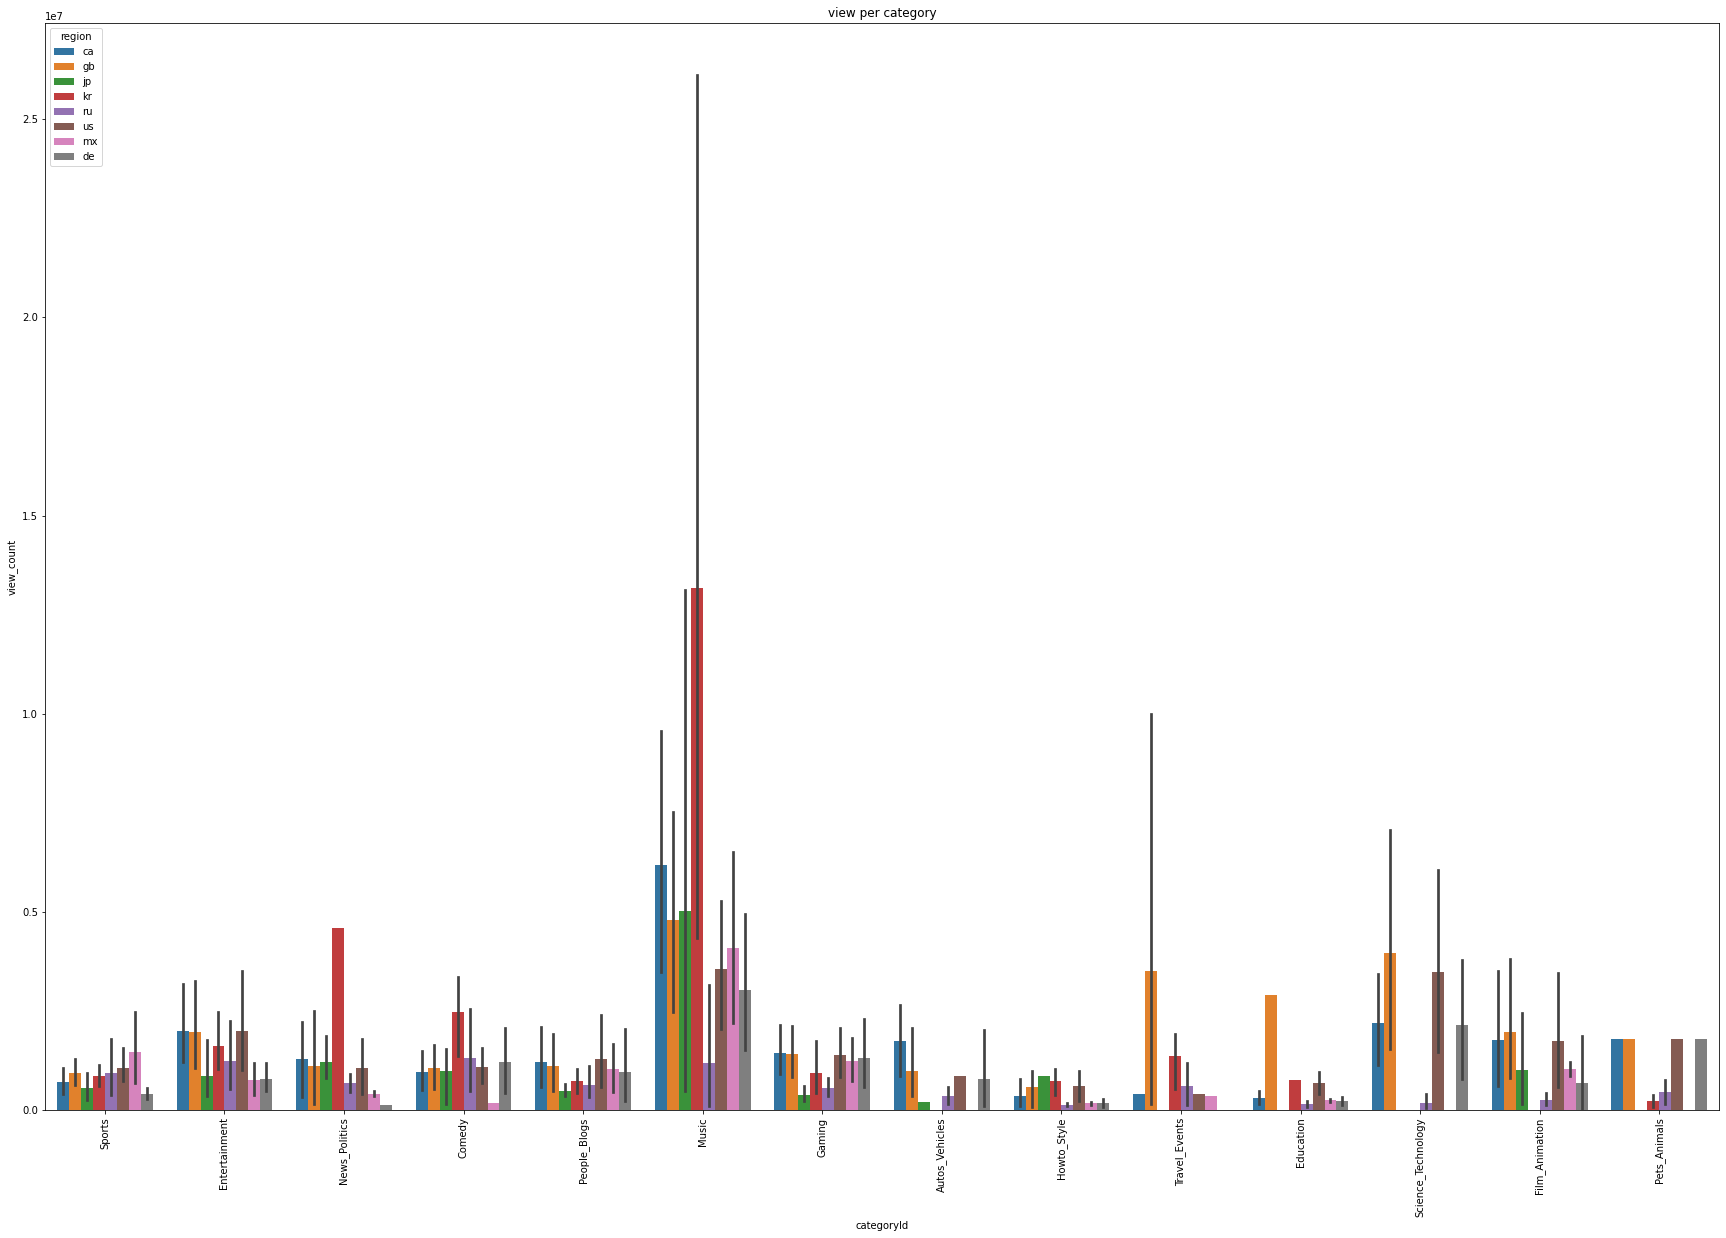

In [116]:
#fix the percentages
plt.figure(figsize=(30,20))
plt.title('view per category')
plt.xticks(rotation=90)
sns.barplot(data=df,x=df.categoryId, y=df.view_count,hue=df.region)